# Implement KMeans clustering on iris Dataset 

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df=pd.read_csv("Iris.csv")

In [35]:
df1=df.copy()

In [36]:
df1.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
df1.drop(columns="Species",inplace=True)

In [37]:
df1.drop(columns="Id",inplace=True)

In [8]:
df1.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

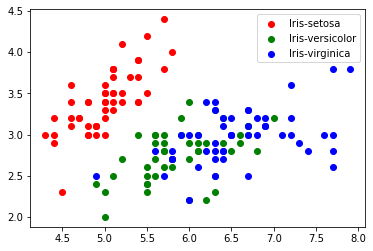

In [55]:
k1=df[df["Species"]=="Iris-setosa"]
k2=df[df["Species"]=="Iris-versicolor"]
k3=df[df["Species"]=="Iris-virginica"]

plt.scatter(k1["SepalLengthCm"],k1["SepalWidthCm"],c="r",label="Iris-setosa")
plt.scatter(k2["SepalLengthCm"],k2["SepalWidthCm"],c="g",label="Iris-versicolor")
plt.scatter(k3["SepalLengthCm"],k3["SepalWidthCm"],c="b",label="Iris-virginica")

plt.legend()

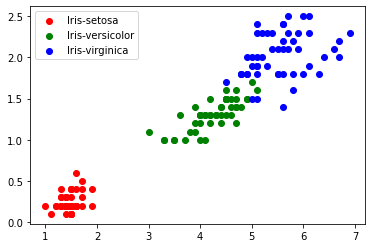

In [56]:
k1=df[df["Species"]=="Iris-setosa"]
k2=df[df["Species"]=="Iris-versicolor"]
k3=df[df["Species"]=="Iris-virginica"]

plt.scatter(k1["PetalLengthCm"],k1["PetalWidthCm"],c="r",label="Iris-setosa")
plt.scatter(k2["PetalLengthCm"],k2["PetalWidthCm"],c="g",label="Iris-versicolor")
plt.scatter(k3["PetalLengthCm"],k3["PetalWidthCm"],c="b",label="Iris-virginica")

plt.legend()

In [9]:
#normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1)
df1 = pd.DataFrame(data_scaled)
df1.head(5)

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [58]:
kmeans.inertia_

50.55609184953446

In [59]:
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(df1)
    SSE.append(kmeans.inertia_)

C:\Users\Aniket kumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [61]:
SSE[0:3]

[680.8243999999996, 152.36870647733915, 78.94084142614601]

Text(0, 0.5, 'Inertia')

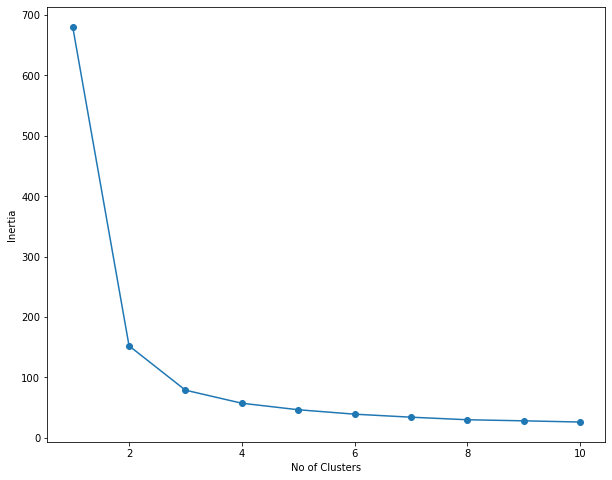

In [62]:
#elbow method

frame = pd.DataFrame({'Cluster': range(1,11), 'SSE':SSE})
plt.figure(figsize=(10,8))
plt.plot(frame['Cluster'], frame ['SSE'], marker = 'o')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')

In [63]:
#Kmeans
kmeans = KMeans(n_clusters = 3, max_iter=100, random_state=0)
kmeans.fit(df1)

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [64]:
#prediction
pred = kmeans.fit_predict(df1)

In [70]:
df1.cluster.unique()

array([1, 0, 2])

In [65]:
frame = pd.DataFrame(df1)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    62
1    50
2    38
Name: cluster, dtype: int64

In [71]:
df1.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


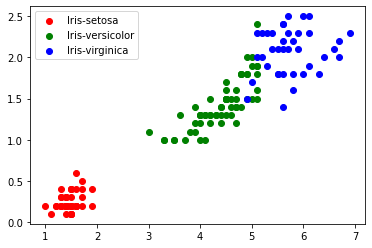

In [74]:
k1=df1[df1["cluster"]==1]
k2=df1[df1["cluster"]==0]
k3=df1[df1["cluster"]==2]

plt.scatter(k1["PetalLengthCm"],k1["PetalWidthCm"],c="r",label="Iris-setosa")
plt.scatter(k2["PetalLengthCm"],k2["PetalWidthCm"],c="g",label="Iris-versicolor")
plt.scatter(k3["PetalLengthCm"],k3["PetalWidthCm"],c="b",label="Iris-virginica")

plt.legend()